#Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential , Model
from keras.layers import Dense, Dropout,Input,BatchNormalization , Add
from keras.optimizers import SGD
from keras.utils import plot_model
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
# for access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# import zipfile
# # unzip dataset file 
# local_zip = '/content/gdrive/MyDrive/Proj3.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content/gdrive/MyDrive/Proj3_data')
# zip_ref.close()

In [ ]:
# read dataset
train_tr = pd.read_csv('/content/gdrive/MyDrive/Proj3_data/Proj3/train_transaction.csv')
test_tr = pd.read_csv('/content/gdrive/MyDrive/Proj3_data/Proj3/test_transaction.csv')

train_id = pd.read_csv('/content/gdrive/MyDrive/Proj3_data/Proj3/train_identity.csv')
test_id = pd.read_csv('/content/gdrive/MyDrive/Proj3_data/Proj3/test_identity.csv')

# for predicting test data and save it
sample_submission = pd.read_csv('/content/gdrive/MyDrive/Proj3_data/Proj3/sample_submission.csv')

##less memory usage

In [ ]:
train_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [ ]:
test_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB


In [ ]:
train_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
test_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141907 entries, 0 to 141906
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  141907 non-null  int64  
 1   id-01          141907 non-null  float64
 2   id-02          136976 non-null  float64
 3   id-03          66481 non-null   float64
 4   id-04          66481 non-null   float64
 5   id-05          134750 non-null  float64
 6   id-06          134750 non-null  float64
 7   id-07          5059 non-null    float64
 8   id-08          5059 non-null    float64
 9   id-09          74338 non-null   float64
 10  id-10          74338 non-null   float64
 11  id-11          136778 non-null  float64
 12  id-12          141907 non-null  object 
 13  id-13          130286 non-null  float64
 14  id-14          71357 non-null   float64
 15  id-15          136977 non-null  object 
 16  id-16          125747 non-null  object 
 17  id-17          135966 non-nul

بعد از چاپ اطلاعات مربوط به جدول شناسه مربوط به داده های آموزشی و داده های تست 
می بینیم که تعداد ستون های آن ها یکسان هست ولی در داده های تست ستونهایی که با شناسه شروع میشنوند بین شناسه و شماره علامت دش هست ولی در داده های آموزشی بجای دش، آندرلاین است. که این بعدا باید درست شود.

###change dtype fo columns

In [ ]:
# convert object to categorical in train_tr
traintr_des = train_tr.select_dtypes(include=['object'])
for col in traintr_des.columns:
  train_tr[col] = train_tr[col].astype('category')
del traintr_des

In [ ]:
# convert object to categorical in train_id
trainid_des = train_id.select_dtypes(include=['object'])
for col in trainid_des.columns:
  train_id[col] = train_id[col].astype('category')
del trainid_des 

In [ ]:
# convert object to categorical in test_tr
testtr_des = test_tr.select_dtypes(include=['object'])
for col in testtr_des.columns:
  test_tr[col] = test_tr[col].astype('category')
del testtr_des  

In [ ]:
# convert object to categorical in test_id
testid_des = test_id.select_dtypes(include=['object'])
for col in testid_des.columns:
  test_id[col] = test_id[col].astype('category')
del testid_des 

با اجرای قطعه کدهای پایین برای عوض کردن نوع تایپ داده های موجود در هر ستون مبینیم که خیلی در آزاد سازی مموری موثر بوده است چون تعداد خیلی زیادی داده فلوت داریم.

In [ ]:
# conver float64 to float in tain_tr
traintr_des = train_tr.select_dtypes(include=['float64']).columns
for col in traintr_des:
  train_tr[col] = pd.to_numeric(train_tr[col], downcast='float')
del traintr_des  

In [ ]:
# conver float64 to float in test_tr
testtr_des = test_tr.select_dtypes(include=['float64'])
for col in testtr_des.columns:
  test_tr[col] = pd.to_numeric(test_tr[col], downcast='float')
del testtr_des  

In [ ]:
# conver float64 to float in test_id
testid_des = test_id.select_dtypes(include=['float64'])
for col in testid_des.columns:
  test_id[col] = pd.to_numeric(test_id[col], downcast='float')
del testid_des  

In [ ]:
# conver float64 to float in train_id
trainid_des = train_id.select_dtypes(include=['float64'])
for col in trainid_des.columns:
  train_id[col] = pd.to_numeric(train_id[col], downcast='float')
del trainid_des  

داده هایی که حجم آن ها کم شده است را ذخیره می کنیم تا در بار بعدی هزینه و مموری کمتری صرف شود

In [ ]:
# train_tr.to_csv('train_tr.csv',index=False)
# train_id.to_csv('train_id.csv', index=False)

# test_tr.to_csv('test_tr.csv', index=False)
# test_id.to_csv('test_id.csv', index=False)

In [ ]:
# train_tr = pd.read_csv('/content/gdrive/MyDrive/proj3_lessmem/train_tr.csv')
# test_tr = pd.read_csv('/content/gdrive/MyDrive/proj3_lessmem/test_tr.csv')

# train_id = pd.read_csv('/content/gdrive/MyDrive/proj3_lessmem/train_id.csv')
# test_id = pd.read_csv('/content/gdrive/MyDrive/proj3_lessmem/test_id.csv')

انتظار میره که حجمش کم باشه نسبت به دده اولیه

#check data

In [ ]:
train_tr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_tr.shape

(590540, 394)

In [ ]:
# number of Fraudes in dataset
(train_tr.isFraud == 1).sum()

20663

In [ ]:
item_counts = train_tr["isFraud"].value_counts()
print(item_counts)

0    569877
1     20663
Name: isFraud, dtype: int64


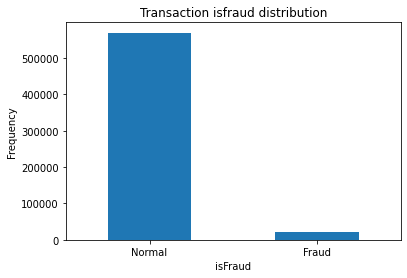

In [ ]:
# Fraud distribution in train_tr
LABELS = ["Normal", "Fraud"]

count_classes = train_tr.value_counts(train_tr['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction isfraud distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("isFraud")
plt.ylabel("Frequency");

با توجه به شکل بالا میبینیم که تقلب پیدی شایعی نیست به همین دلیل تشخیص آن کار آسانی نیست

In [ ]:
train_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_id.shape

(144233, 41)

In [ ]:
test_tr.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950001,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950012,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.949997,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_tr.shape

(506691, 393)

In [ ]:
test_id.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [ ]:
test_id.shape

(141907, 41)

# Merging transaction and identity data

In [ ]:
# merging train_tr and train_id
train = pd.merge(train_tr, train_id, how='left', on='TransactionID', left_index=True, right_index=True)

# merging test_tr and test_id
test = pd.merge(test_tr, test_id, how='left', on='TransactionID', left_index=True, right_index=True)

In [ ]:
train.shape

(590540, 434)

In [ ]:
test.shape

(506691, 433)

In [ ]:
# less memory usage
del train_tr
del train_id
del test_tr
del test_id

In [ ]:
import gc
gc.collect()

2448

بعد از کارهایی که در ابتدا برای کاهش استفاده از مموری انجام شد مبینیم که دیگر داده ای از تابع آبجکت نداریم و همگی به نوع دسته بندی تبدیل شده اند برای کاهش فضا و همچنیم همه ستون هایی که از نوع اعداد اعشاری 64 بودند به عدد اعشاری 32 تبدیل شده اند یعنی با اینکار حافظه اشغالی برای اعداد اعشاری نصف حالت قبل می شود
برای بهبود حافظه می توان اعداد صحیح64 را نیز به 32 تبدیل کرد یا در صورتی که یک ستونی هیچ عدد منفی ای ندارد به نوع بدون علامت تبدیل کرد که حافظه کمتری اشعال شود لی در اینجا می بینیم که تعداد ستون هایی که از نوع عدد صحیحی هستند در حد 4 است و تغییر چندانی نخواهیم داشت..

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: category(31), float32(399), int64(4)
memory usage: 936.1 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: category(31), float32(399), int64(3)
memory usage: 799.4 MB


In [ ]:
# for col in train.select_dtypes(include=['int64']).columns:
#   if train[col].min() >=0:
#     train[col] = pd.to_numeric(train[col], downcast='unsigned')

چاپ ستون هایی در داده های اموزشی که مربوط به دسته بندی هستند

In [ ]:
train_description = train.select_dtypes(include=['category']) 
train_description.describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


In [ ]:
type(train_description)

pandas.core.frame.DataFrame

In [ ]:
train_description.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

چاپ ستون هایی در داده های تست که مربوط به دسته بندی هستند

In [ ]:
test_description = test.select_dtypes(include=['category'])
test_description.describe()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id-12,id-15,id-16,id-23,id-27,id-28,id-29,id-30,id-31,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
count,506691,503605,503684,437499,135870,330052,330052,330052,268946,197059,347752,271673,271687,271687,141907,136977,125747,5062,5062,136778,136778,70659,136625,70671,72175,136977,136977,136977,136977,136931,115057
unique,5,4,3,60,60,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,86,135,390,2,2,2,2,2,2,2226
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 70.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,360987,334882,385021,207448,61738,330021,302855,266513,161384,107664,191577,233230,168399,236279,120895,67962,66481,3714,5059,75581,74338,21015,16054,16868,72174,71650,133287,104697,95058,74403,44988


In [ ]:
test_description.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id-12', 'id-15',
       'id-16', 'id-23', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-33',
       'id-34', 'id-35', 'id-36', 'id-37', 'id-38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [ ]:
del test_description
del train_description

In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.950001,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663552,18403310,284.950012,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663553,18403317,67.949997,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


با قطعه کد زیر تفاوت که بین ستون های داد ه های تست و آموزشی بود برطرف میشود و بین 2 کلمه همیشه آندرلاین  است و دش نیست

In [ ]:
test.columns = [x.replace('-','_') for x in test.columns]

In [ ]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950001,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663550,18403263,49.000000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663551,18403310,171.000000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663552,18403310,284.950012,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663553,18403317,67.949997,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


طبق قطعه کد زیر هم میبینیم که تنها تفاوت ستون های داده های آموزشی و داده های تست داشتن ستون مربوط به اطلاعات تقلب در داده های آموزشی است.

In [ ]:
def differentcolumns(traincols, testcols):
    for i in traincols:
        if i not in testcols:
            print(i)
differentcolumns(train.columns, test.columns)

isFraud


#Missing values

تعداد کل خانه های خالی در داده های آموزشی

In [ ]:
train.isnull().sum().sum()

115523073

یعنی در داده های آموزشی که داریم، 45 درصد از جدول داده های نال و خالی است که باید برای آن ها تدبیری اندیشیده شود و جدول را تمیز کنیم .

In [ ]:
print("Ratio of the number of empty variables to the total variables : " + str((train.isnull().sum().sum())/(train.shape[0]*train.shape[1])))

Ratio of the number of empty variables to the total variables : 0.45074371905803934


In [ ]:
# number of nulls in each columns
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

حالا می خواهیم برحسب تعداد  نال ها در هر ستون بین آن ها وابستگی پیدا کنیم و ویژگی هایی که بیشتر از 75 درصد بهم وابسته هستند را حذف کنیم.

In [ ]:
nans_df = train.isna()
nans_groups={}
# i_cols = ['V'+str(i) for i in range(1,340)]
for col in train.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
del nans_df; x=gc.collect()
sorted_nans_groups = dict(sorted(nans_groups.items()))

for k,v in sorted_nans_groups.items():
    print('####### NAN count =',k)
    print(v)

####### NAN count = 0
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 12
['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']
####### NAN count = 314
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']
####### NAN count = 1269
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 1565
['card3']
####

اول از همه بین ویژگی هایی که با حرف وی انگلیسی شروع می شوند مقایسه انجام می دهیم و همبستگی آنها را می سنجیم زیرا تعدادشان خیلی زیاد است

In [ ]:
def make_corr(Vs,Vtitle=''):
    cols = ['TransactionDT'] + Vs
    plt.figure(figsize=(15,15))
    sns.heatmap(train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Vtitle!='': plt.title(Vtitle,fontsize=14)
    else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()

طبق ماتریس همبستگی بالا بین این ویژگی ها گروه بندی ای شبیه گروه بندی زیر مشاهد می شود(براساس اینکه کدام دو یژگی برزگتر یا مساوی 75 درصد وابستگی داشته باشند آن ها را در یک گروه می گذاریم) حالا از هر گروه فقط یکی را انتخاب می کنیم.

In [ ]:
def reduce_group(grps,c='V'):
    use = []
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = train[c+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
            #print(str(gg)+'-'+str(n),', ',end='')
        use.append(vx)
        #print()
    print('Use these',use)

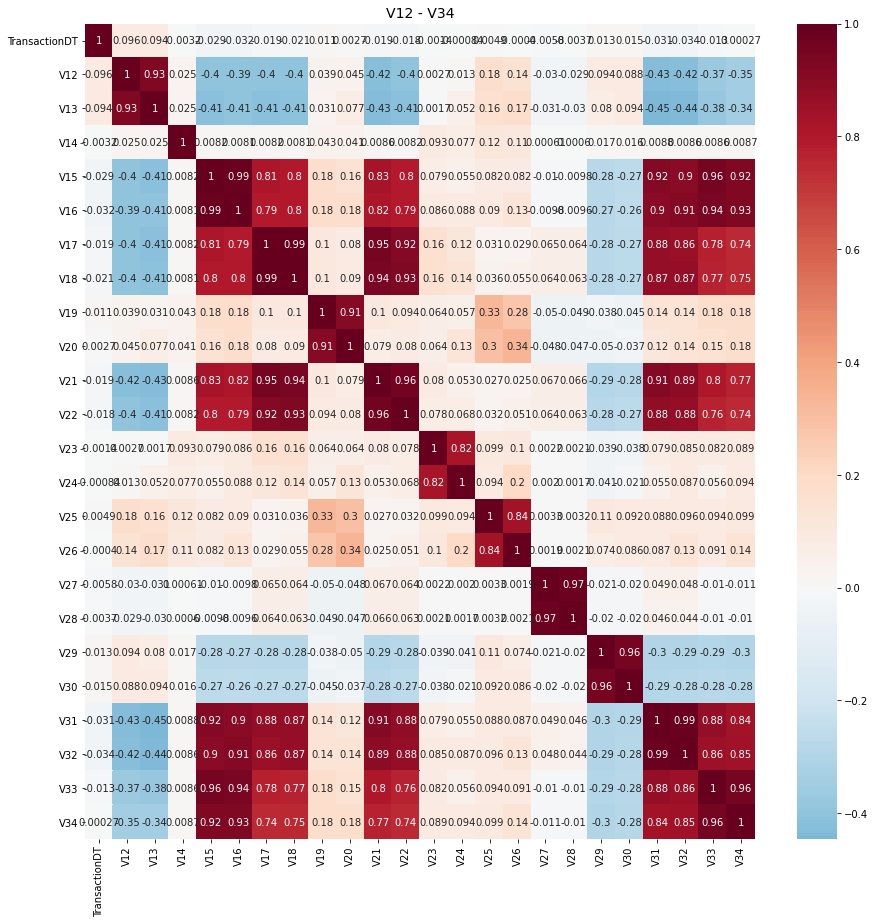

In [ ]:
Vs = nans_groups[76073]
make_corr(Vs)

In [ ]:
grps = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
reduce_group(grps)

Use these [13, 14, 17, 20, 23, 26, 27, 30]


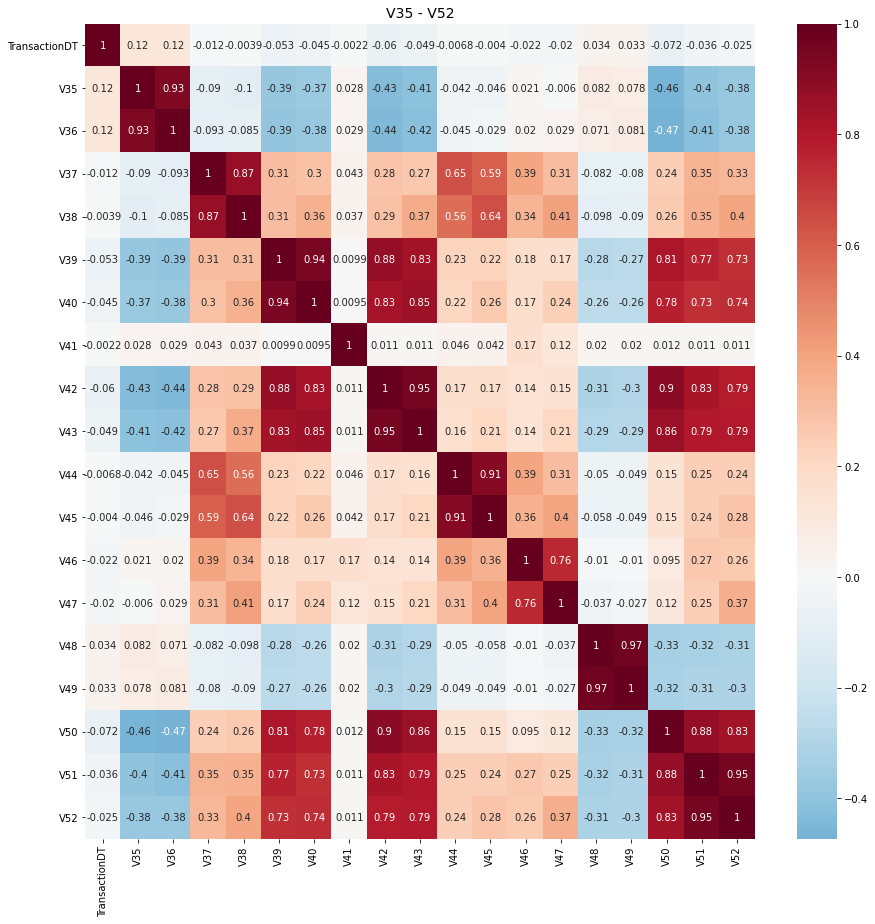

In [ ]:
Vs = nans_groups[168969]
make_corr(Vs)

In [ ]:
grps = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
reduce_group(grps)

Use these [36, 37, 40, 41, 44, 47, 48]


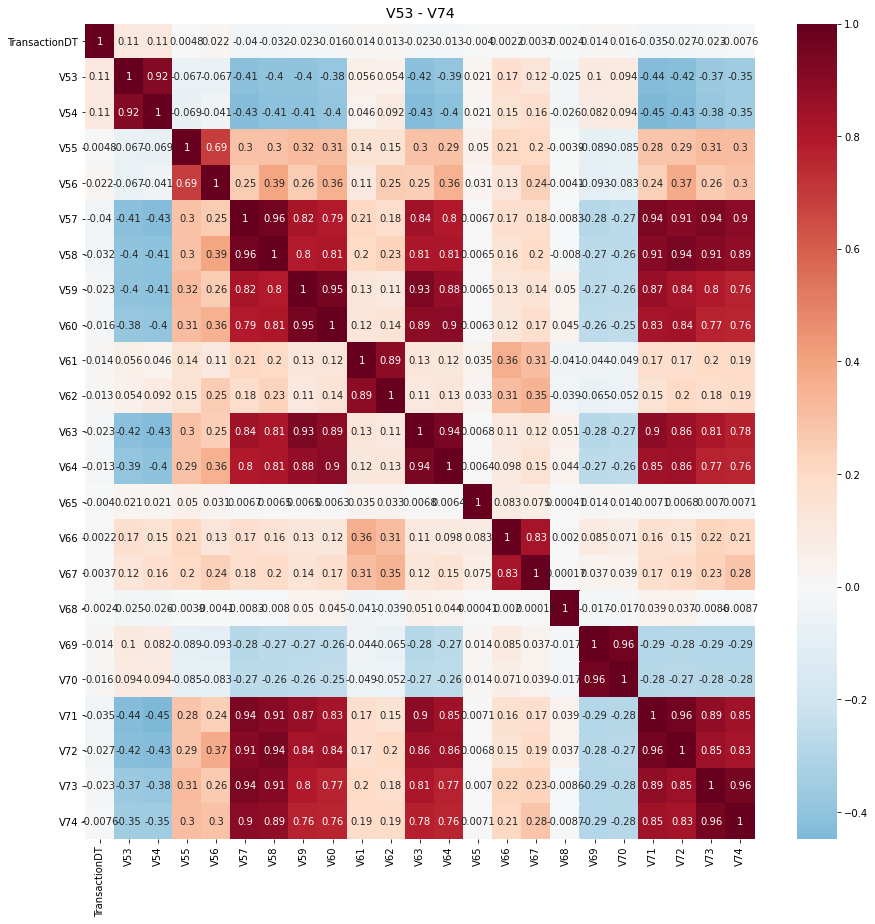

In [ ]:
Vs = nans_groups[77096]
make_corr(Vs)

In [ ]:
grps = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
reduce_group(grps)

Use these [54, 56, 59, 62, 65, 67, 68, 70]


از وی  (چون از وی 1 تا 12 تعداد خیلی زیادی نال دارد و حذف می شود.)12 تا وی 74 این کار را انجام می دهیم زیرا از آن به بعد تعداد وی ها زیاد می شود و مقایسه سخت می شود.

  طبق کد زیر میبینمی که بین 74 ویژگی اول که با وی شروع می شوند تنها 23 تای آنها استفاده می شوند و بقیه حذف می شوند.

In [ ]:
v = [13, 14, 17, 20, 23, 26, 27, 30]
v += [36, 37, 40, 41, 44, 47, 48]
v += [54, 56, 59, 62, 65, 67, 68, 70]
print("reduced v: ", v)
len(v)

reduced v:  [13, 14, 17, 20, 23, 26, 27, 30, 36, 37, 40, 41, 44, 47, 48, 54, 56, 59, 62, 65, 67, 68, 70]


23

In [ ]:
v_delete = []
for i in range(12,75):
  if i not in v:
    v_delete.append(i)
print(v_delete)
print(len(v_delete))    

[12, 15, 16, 18, 19, 21, 22, 24, 25, 28, 29, 31, 32, 33, 34, 35, 38, 39, 42, 43, 45, 46, 49, 50, 51, 52, 53, 55, 57, 58, 60, 61, 63, 64, 66, 69, 71, 72, 73, 74]
40


In [ ]:
V_delete = []
for i in v_delete:
  V_delete.append("V"+str(i))

In [ ]:
print(V_delete, len(V_delete))

['V12', 'V15', 'V16', 'V18', 'V19', 'V21', 'V22', 'V24', 'V25', 'V28', 'V29', 'V31', 'V32', 'V33', 'V34', 'V35', 'V38', 'V39', 'V42', 'V43', 'V45', 'V46', 'V49', 'V50', 'V51', 'V52', 'V53', 'V55', 'V57', 'V58', 'V60', 'V61', 'V63', 'V64', 'V66', 'V69', 'V71', 'V72', 'V73', 'V74'] 40


In [ ]:
# Drop the columns
train.drop(V_delete, axis=1, inplace=True)
test.drop(V_delete, axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(590540, 394)
(506691, 393)


از اینجا به بعد ب حذف ستون هایی می پردازیم که داده های ننال زیادی دارند.

In [ ]:
# function for return nulls in dataset
def getnulls(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
    return missing_data

این تابع برای هر ستون از داده ها تعداد خانه های خالی را محاسبه می کند همچنین درصد داده های خالی در آن ستون را محاسبه می کند و این اطلاعات را به ترتیب نزولی نشان می دهد یعنی ستونی که بیشترین تعداد خانه خالی را دارد اول نشان داده می شود.

In [ ]:
# Train Data Missing Values
miss_train = getnulls(train)
miss_train.head(30).T

,id_24,id_25,id_07,id_08,id_21,id_26,id_22,id_23,id_27,dist2,D7,id_18,D13,D14,D12,id_04,id_03,D6,id_33,D9,id_10,D8,id_09,id_30,id_32,id_34,id_14,V155,V141,V142
total,585793.000000,585408.00000,585385.000000,585385.000000,585381.000000,585377.000000,585371.000000,585371.000000,585371.000000,552913.000000,551623.000000,545427.000000,528588.000000,528353.000000,525823.00000,524216.000000,524216.000000,517353.000000,517251.000000,515614.000000,515614.000000,515614.000000,515614.000000,512975.000000,512954.000000,512735.000000,510496.000000,508595.000000,508595.000000,508595.000000
percent,0.991962,0.99131,0.991271,0.991271,0.991264,0.991257,0.991247,0.991247,0.991247,0.936284,0.934099,0.923607,0.895093,0.894695,0.89041,0.887689,0.887689,0.876068,0.875895,0.873123,0.873123,0.873123,0.873123,0.868654,0.868619,0.868248,0.864456,0.861237,0.861237,0.861237


In [ ]:
# Test Data Missing Values
miss_test = getnulls(test)
miss_test .head(30).T

,id_24,id_25,id_26,id_07,id_21,id_08,id_27,id_23,id_22,dist2,id_18,D7,id_03,id_04,D12,id_30,id_33,id_32,id_14,id_34,id_10,id_09,D9,D8,V138,V153,V139,V156,V146,V142
total,501951.000000,501652.000000,501644.000000,501632.000000,501632.000000,501632.000000,501629.00000,501629.00000,501629.00000,470255.00000,455816.000000,446558.000000,440210.000000,440210.000000,437437.000000,436032.000000,436020.000000,436020.000000,435334.000000,434516.000000,432353.000000,432353.000000,432353.000000,432353.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000,430906.000000
percent,0.990645,0.990055,0.990039,0.990016,0.990016,0.990016,0.99001,0.99001,0.99001,0.92809,0.899594,0.881322,0.868794,0.868794,0.863321,0.860548,0.860524,0.860524,0.859171,0.857556,0.853287,0.853287,0.853287,0.853287,0.850432,0.850432,0.850432,0.850432,0.850432,0.850432


ویژگی هایی که بیشتر از 50 درصد داده ی نال دارند را پیدا می کنیم و از داده های آموزشی و تست حذف می کنیم.

In [ ]:
# Get the columns that we have to drop
dropcols = miss_train[miss_train['percent'] > 0.5].index
print(dropcols)
print(len(dropcols))
print(type(dropcols))

Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
       'id_27', 'dist2',
       ...
       'V271', 'V255', 'id_01', 'id_12', 'dist1', 'M5', 'M7', 'M9', 'M8',
       'D5'],
      dtype='object', length=214)
214
<class 'pandas.core.indexes.base.Index'>


In [ ]:
# Drop the columns
train.drop(dropcols, axis=1, inplace=True)
test.drop(dropcols, axis=1, inplace=True)

In [ ]:
train.shape

(590540, 180)

In [ ]:
test.shape

(506691, 179)

In [ ]:
miss_train = getnulls(train)
miss_train.head(40).T

,M4,D2,V5,D11,V4,V10,V9,V11,V3,V2,V1,V6,V7,V8,M3,M2,M1,D3,M6,V47,V48,V44,V41,V40,V37,V36,D4,P_emaildomain,V83,V82,V81,V80,V79,V90,V84,V85,V77,V86,V87,V88
total,281444.000000,280797.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,271100.000000,271100.000000,271100.000000,262878.000000,169360.000000,168969.000000,168969.000000,168969.000000,168969.000000,168969.000000,168969.000000,168969.000000,168922.000000,94456.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000
percent,0.476588,0.475492,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.459071,0.459071,0.459071,0.445149,0.286788,0.286126,0.286126,0.286126,0.286126,0.286126,0.286126,0.286126,0.286047,0.159949,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987


In [ ]:
miss_test = getnulls(test)
miss_test.head(40).T

,M4,D2,D3,M1,M2,M3,V2,D11,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,M6,V48,V36,V37,V40,V41,V44,V47,D4,P_emaildomain,addr1,addr2,V56,V54,V65,V67,V68,V70,V59,V62,V23,V20
total,237745.000000,234769.000000,203142.000000,176639.000000,176639.000000,176639.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,158939.00000,76854.000000,76854.000000,76854.000000,76854.000000,76854.000000,76854.000000,76854.000000,76851.000000,69192.000000,65609.000000,65609.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12589.000000,12589.000000
percent,0.469211,0.463338,0.400919,0.348613,0.348613,0.348613,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.31368,0.151678,0.151678,0.151678,0.151678,0.151678,0.151678,0.151678,0.151672,0.136557,0.129485,0.129485,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457,0.024846,0.024846


ستون هایی را که فقط در آنها یک مقدار متمایز است را شناسایی می کنیم و حذف می کنیم.

In [ ]:
# drop columns with single value
train_single_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
test_single_value_cols = [col for col in test.columns if test[col].nunique() <= 1]

In [ ]:
train_single_value_cols

[]

In [ ]:
test_single_value_cols

['V107']

In [ ]:
remove_col = np.unique(train_single_value_cols + test_single_value_cols)
remove_col

array(['V107'], dtype='<U4')

In [ ]:
train.drop(columns = remove_col, axis=1, inplace=True)
test.drop(columns = remove_col,  axis=1, inplace=True)

In [ ]:
train.shape

(590540, 179)

In [ ]:
test.shape

(506691, 178)

ستون هایی را که بیشتر از 90 درصد آن ها داده ی تکراری دارد را پاک می کنیم.
که طبق کد زیر 54 ستون با این ویژگی داریم. ستون مربوط به تشخیص تقلب نیز در این لیست هست که چون خروجی است باید ازاین لیست پاک شود و بقیه ی ستوهن های ایت لیست باید هم از داده های آموزشی و م از داده های تست پاک شوند.

In [ ]:
# remove Columns having one value more than 90% in Train Data
train_dominating_columns = [c for c in train.columns if train[c].value_counts(dropna=False, normalize=True).values[0] >= 0.9]

print('No. of Columns having one value more than 90% in Train Data : ', str(len(train_dominating_columns)))

print(train_dominating_columns)

No. of Columns having one value more than 90% in Train Data :  54
['isFraud', 'C3', 'V98', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V284', 'V286', 'V290', 'V293', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V305', 'V309', 'V311', 'V316', 'V318', 'V319', 'V320', 'V321']


In [ ]:
train_dominating_columns.remove('isFraud')

In [ ]:
len(train_dominating_columns)

53

In [ ]:
train.drop(train_dominating_columns, axis=1, inplace=True) 
test.drop(train_dominating_columns, axis=1, inplace=True)

In [ ]:
train.shape

(590540, 126)

In [ ]:
test.shape

(506691, 125)

In [ ]:
train_description = train.select_dtypes(include=['category']) 
train_description.describe()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
count,590540,588963,588969,496084,319440,319440,319440,309096,421180
unique,5,4,4,59,2,2,2,3,2
top,W,visa,debit,gmail.com,T,T,T,M0,F
freq,439670,384767,439938,228355,319415,285468,251731,196405,227856


In [ ]:
print(train_description.columns)
len(train_description.columns)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4',
       'M6'],
      dtype='object')


9

In [ ]:
train.mean()

TransactionID     3.282270e+06
isFraud           3.499001e-02
TransactionDT     7.372311e+06
TransactionAmt    1.348496e+02
card1             9.898735e+03
                      ...     
V312              3.917266e+01
V313              2.135373e+01
V314              4.331606e+01
V315              2.680951e+01
V317              2.476003e+02
Length: 117, dtype: float64

In [ ]:
# column = ['P_emaildomain','R_emaildomain']
# corr = train[column].corr()
# plt.subplots(figsize=(20, 20))
# sns.heatmap(corr, annot=True)

In [ ]:
# only drop rows where all columns NaN
train = train.dropna(how='all')

طبق زیر می بینیم که در داده هایمان ستونی وجود ندارد که همه ی مقادیر آن نال باشد.

In [ ]:
train.shape

(590540, 126)

#handle missing values

###Imputation for Categorical Data

داده هایی را که از نوع دسته بندی هستند را با بیشرین داده ای که در آن ستون تکرار می شود پر می کنیم

In [ ]:
# imputing by mode of columns
for col in train_description.columns:
   train[col] = train[col].fillna(train[col].mode()[0])
   test[col] = test[col].fillna(train[col].mode()[0])

In [ ]:
miss_train = getnulls(train)
miss_train.head(30).T

,D2,V11,V1,V4,D11,V2,V5,V10,V9,V8,V7,V6,V3,D3,V36,V37,V40,V41,V47,V48,V44,D4,V75,V90,V76,V77,V78,V79,V80,V81
total,280797.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,279287.000000,262878.000000,168969.000000,168969.000000,168969.000000,168969.000000,168969.000000,168969.000000,168969.000000,168922.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000
percent,0.475492,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.472935,0.445149,0.286126,0.286126,0.286126,0.286126,0.286126,0.286126,0.286126,0.286047,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987


In [ ]:
miss_test = getnulls(test)
miss_test.head(30).T

,D2,D3,V8,D11,V1,V10,V9,V2,V7,V6,V5,V4,V3,V11,V36,V37,V40,V41,V44,V48,V47,D4,addr1,addr2,V70,V68,V67,V65,V62,V59
total,234769.000000,203142.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,176518.000000,76854.000000,76854.000000,76854.000000,76854.000000,76854.000000,76854.000000,76854.000000,76851.000000,65609.000000,65609.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000,12899.000000
percent,0.463338,0.400919,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.348374,0.151678,0.151678,0.151678,0.151678,0.151678,0.151678,0.151678,0.151672,0.129485,0.129485,0.025457,0.025457,0.025457,0.025457,0.025457,0.025457


In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,...,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,13.0,13.0,0.0,T,T,T,M2,T,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,T,T,T,M0,T,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,outlook.com,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,0.0,315.0,315.0,T,T,T,M0,F,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,yahoo.com,2.0,5.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,84.0,NaN,111.0,T,T,T,M0,F,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,10.0,4.0,50.0,1758.0,925.0,354.0,135.0,1.0,28.0,0.0,0.0,10.0,4.0,0.0,0.0,1.0,1.0,38.0,0.0,0.0,0.0,50.0,1758.0,925.0,354.0,135.0,0.0,0.0,0.0,1404.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,gmail.com,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,T,T,T,M0,F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.isnull().sum()

TransactionID        0
isFraud              0
TransactionDT        0
TransactionAmt       0
ProductCD            0
                  ... 
V312                12
V313              1269
V314              1269
V315              1269
V317                12
Length: 126, dtype: int64

In [ ]:
test.isnull().sum()

TransactionID        0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
                  ... 
V312                 3
V313              6031
V314              6031
V315              6031
V317                 3
Length: 125, dtype: int64

برای مثال ستون مربوط به ;کارت شماره 4 در هنگام تراکنش که از نوع داده دسته بندی بود و 1577 داده نال در داده آموزشی داشت را تست می کنیم و می بینیم که نه تنها در داده های آموزشی بلکه در داده های تست هم جاهای خالی آن پر شده اند.

In [ ]:
train['card4'].isnull().sum()

0

In [ ]:
test['card4'].isnull().sum()

0

###Imputation for Numeric Features

ویژگی هایی را که از نوع ععدی هستند و مقادیر خالی دارند را با میانگین آن ستون پر می کنیم.

In [ ]:
# imputing by mean of columns
for col in train.columns[train.isnull().any(axis=0)]:     #---Applying Only on variables with NaN values
  train[col].fillna(train[col].mean(),inplace=True)

for col in test.columns[test.isnull().any(axis=0)]:
  test[col].fillna(train[col].mean(),inplace=True)

طبق کد زیر میبینیم که همه ی داده های نال پر شدند. 

In [ ]:
train.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
                 ..
V312              0
V313              0
V314              0
V315              0
V317              0
Length: 126, dtype: int64

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

**All the null values have been handled:)**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 126 entries, TransactionID to V317
dtypes: category(9), float32(113), int64(4)
memory usage: 282.2 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 125 entries, TransactionID to V317
dtypes: category(9), float32(113), int64(3)
memory usage: 234.4 MB


In [ ]:
print(train.shape)
print(test.shape)

(590540, 126)
(506691, 125)


#preprocessing data

##encoding variables

دوباره برای انکد مردن داده هایی که از وع دسته بندی هستند باید دادهای تست و آموزشی را زیر هم بنویسیم و تغییرات را انجام دهیم.

In [ ]:
train_description = train.select_dtypes(include=['category']) 
train_description.describe()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
count,590540,590540,590540,590540,590540,590540,590540,590540,590540
unique,5,4,4,59,2,2,2,3,2
top,W,visa,debit,gmail.com,T,T,T,M0,F
freq,439670,386344,441509,322811,590515,556568,522831,477849,397216


In [ ]:
len(train_description.columns)

9

در این مرحله باید داده ها را به شکل قابل فهم برای آتوانکدر دربیاریم یعنی داده های متنی را به شکل عددی دربیاوریم برای اینکار از لیبل انکودینگ استفاده می کنیم . برای بهتر شدن کار و برای اینکه شبکه فکر نکند ما به دسته بندی ها وزن داده ایم، می توان از وان هات انکودر نیز استفاده کرد ولی با توجه به اینکه ستون های ما خیلی زیاد هستند و تعداد ویژگی متمایز بعضی ستون ها در حد 59 تا است اضافه کردن این تعداد ستون به داده ها کار خوبی نیست.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# encoding variables
categorical_subset = []

for i in train_description.columns:
  categorical_subset.append(i)

le = LabelEncoder()
train[categorical_subset] = train[categorical_subset].apply(le.fit_transform) ###########
test[categorical_subset] = test[categorical_subset].apply(le.fit_transform)

طبق جدول زیر میبینیم که تمام ستون هایی که از نوع دسته بندی و عددی بودند با استفاده از لیبل انکودینک به عدد تبدیل شده اند و به شکل قابل فهم برای شبکه عصبی آتوانکدر تبدیل شده است.

In [ ]:
train[categorical_subset].head()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,4,1,1,16,1,1,1,2,1
1,4,2,1,16,1,1,1,0,1
2,4,3,2,35,1,1,1,0,0
3,4,2,2,53,1,1,1,0,0
4,1,2,1,16,1,1,1,0,0


In [ ]:
test[categorical_subset].head()

,ProductCD,card4,card6,P_emaildomain,M1,M2,M3,M4,M6
0,4,3,2,16,1,1,0,0,0
1,4,3,2,2,1,0,0,0,0
2,4,3,2,19,1,1,0,0,0
3,4,3,2,16,1,1,1,0,1
4,4,2,2,16,1,1,1,0,0


### add two new columns to dataset based on TransactioDT

طبق جدول زیر و توضیحات صورت پروژه در مورد ستون سوم به این نتیجه می رسیم واحد این اعداد ثانیه است زیرا این اعداد بریا سال 2017 است و اگر خواسته هباشیم سات و یا دقیقه بگیریم بیشتر از الان که سال 2020 هستیم می شود پس ثانیه است. این ستون را به دو ستون ساعت در روز و روز در هفته تبدیل می کنیم بنظر می رسد کارآمدتر باشد.

In [ ]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D11,D15,M1,M2,M3,M4,M6,V1,...,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317
0,2987000,0,86400,68.5,4,13926,362.583649,150.0,1,142.0,1,315.0,87.0,16,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,169.552765,13.000000,139.99556,13.000000,13.00000,0.000000,1,1,1,2,1,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
1,2987001,0,86401,29.0,4,2755,404.000000,150.0,2,102.0,1,325.0,87.0,16,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,169.552765,28.343348,0.00000,0.000000,146.61763,0.000000,1,1,1,0,1,0.999945,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,4,4663,490.000000,150.0,3,166.0,2,330.0,87.0,35,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,169.552765,28.343348,0.00000,0.000000,315.00000,315.000000,1,1,1,0,0,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,4,18132,567.000000,150.0,2,117.0,2,476.0,87.0,53,2.0,5.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.000000,0.000000,94.00000,84.000000,146.61763,111.000000,1,1,1,0,0,0.999945,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,48.0,28.0,10.0,4.0,50.0,1758.0,925.0,354.0,135.0,1.0,28.0,0.0,0.0,10.0,4.0,0.0,0.0,1.0,1.0,38.0,0.0,0.0,0.0,50.0,1758.0,925.0,354.0,135.0,0.0,0.0,0.0,1404.0
4,2987004,0,86506,50.0,1,4497,514.000000,150.0,2,102.0,1,420.0,87.0,16,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,169.552765,28.343348,139.99556,123.977188,146.61763,163.738007,1,1,1,0,0,0.999945,...,0.999246,0.000902,0.401862,0.420461,0.150322,0.154812,0.137007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#conver transactionDt to two columns
def make_day_feature(df, offset=0, tname='TransactionDT'):
    """
    Creates a day of the week feature, encoded as 0-6. 
    
    Parameters:
    -----------
    offset : float (default=0)
        offset (in days) to shift the start/end of a day.
    tname : str
        Name of the time column in df.
    """
    # found a good offset is 0.58
    days = df[tname] / (3600*24)        
    encoded_days = np.floor(days-1+offset) % 7
    return encoded_days

def make_hour_feature(df, tname='TransactionDT'):
    """
    Creates an hour of the day feature, encoded as 0-23. 
    
    Parameters:
    -----------
    tname : str
        Name of the time column in df.
    """
    hours = df[tname] / (3600)        
    encoded_hours = np.floor(hours) % 24
    return encoded_hours

In [ ]:
train['weekday'] = make_day_feature(train, offset=0.58)
train['hours'] = make_hour_feature(train)

test['weekday'] = make_day_feature(test, offset=0.58)
test['hours'] = make_hour_feature(test)

In [ ]:
train.shape

(590540, 128)

In [ ]:
test.shape

(506691, 127)

In [ ]:
train['weekday'].head(30)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: weekday, dtype: float64

In [ ]:
train['hours'].tail(30)

590510    23.0
590511    23.0
590512    23.0
590513    23.0
590514    23.0
590515    23.0
590516    23.0
590517    23.0
590518    23.0
590519    23.0
590520    23.0
590521    23.0
590522    23.0
590523    23.0
590524    23.0
590525    23.0
590526    23.0
590527    23.0
590528    23.0
590529    23.0
590530    23.0
590531    23.0
590532    23.0
590533    23.0
590534    23.0
590535    23.0
590536    23.0
590537    23.0
590538    23.0
590539    23.0
Name: hours, dtype: float64

In [ ]:
train.drop(['TransactionDT'], axis=1, inplace=True)
test.drop(['TransactionDT'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(590540, 127)
(506691, 126)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 127 entries, TransactionID to hours
dtypes: float32(113), float64(2), int64(12)
memory usage: 322.1 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 126 entries, TransactionID to hours
dtypes: float32(113), float64(2), int64(11)
memory usage: 268.7 MB


طبق شکل زیر میبینیم که رابطه ی چندانی بین روز های هفته و تقلب صورت گرفته وحود ندارد پس این ویژگی به در د نمیخورد و آن را حدف می کنیم

Text(0, 0.5, 'Fraction of fraudulent transactions')

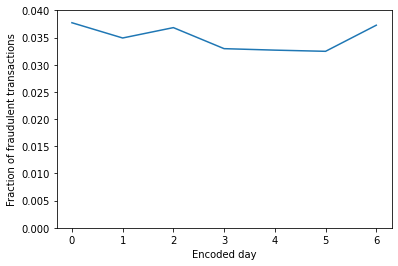

In [ ]:
# Fraction of fraudulent transactions based on weekday
plt.plot(train.groupby('weekday').mean()['isFraud'])
plt.ylim(0, 0.04)
plt.xlabel('Encoded day')
plt.ylabel('Fraction of fraudulent transactions')

سایه های آبی رنگ در نمودار نشان دهنده ی توزیع تراکنش صورت گرفته در ساعات روز است و خط مشکی نشان دهنده وزیع تراکنش های تقلب است که میبیبنیم در ساعاتی که تراکنس کمتر انجام می شود و به خصوص شب ها تراکنش های تقلب انجام می شود.

Text(0, 0.5, 'Number of transactions')

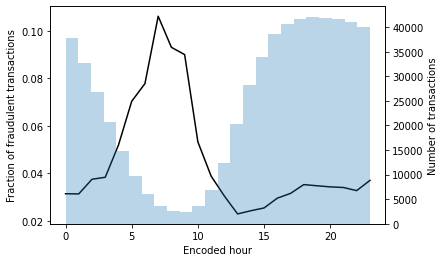

In [ ]:
# number of transactions based on hours of day
plt.plot(train.groupby('hours').mean()['isFraud'], color='k')
ax = plt.gca()
ax2 = ax.twinx()
_ = ax2.hist(train['hours'], alpha=0.3, bins=24)
ax.set_xlabel('Encoded hour')
ax.set_ylabel('Fraction of fraudulent transactions')

ax2.set_ylabel('Number of transactions')

طبق این شکل ها نتیجه می گیریم که ویژگی روزهای هفته ارتباط چندانی با تقلب ندارد در صورتی که ساعت های روز وابستگی خیلی زیادی دارند. بیشتر تقلب ها در شب ها و زمانی که تراکنس های کمی انجام می شوند صورت می گیرد. پس ویژگی روزهای هفته را از داده های تست و آموزشی حذف می کنیم.

In [ ]:
# remove irrelavant columns
train.drop(['weekday'], axis=1, inplace=True)
test.drop(['weekday'], axis=1, inplace=True)

In [ ]:
print(train.shape)
print(test.shape)

(590540, 126)
(506691, 125)


چون ما میخواهیم یک اتوانکدر را آموزش دهیم باید فقط این آتوانکدر روی داده های نرمال بدون تقلب آموزش داده شود پس کاری که میکنیم باید داده های نرمال را جدا کینم . در مرحله تست اگر آتوانکدر خطایش از یک حدی بیشتر شد به این معنی است که داده غیرنرمال به آن داده شده است که نتوانسته آن را بسازد

In [ ]:
# after cleaning the data
# frauds_train = train[train.isFraud == 1]
normal_train = train[train.isFraud == 0]

print(normal_train.shape)

(569877, 126)


چون می دانیم این داده ها نرمالند و آتوانکدر روش یادگیری بدون نظارت است پس برچسب هم نباید داشته باشد و باید برچسب های آن حذف شود

In [ ]:
del train

In [ ]:
normal_train.drop(['isFraud'], axis=1, inplace=True)

In [ ]:
normal_train.shape

(569877, 125)

In [ ]:
# del fraud_train

چون در هر تراکنش شماره مخصوص به خود را دارد این ویژگی نیز تاثیری در تعیین تقلب ندارد و باید پاک شود.

In [ ]:
normal_train.drop(['TransactionID'], axis=1, inplace=True)
test_id = test['TransactionID']
test.drop(['TransactionID'], axis=1, inplace=True)
print(normal_train.shape)
print(test.shape)

(569877, 124)
(506691, 124)


##normalize dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
normal_train = sc.fit_transform(normal_train)
test = sc.transform(test)

In [ ]:
normal_train

array([[2.13697910e-03, 1.00000000e+00, 7.43044378e-01, ...,
        0.00000000e+00, 8.72997515e-04, 0.00000000e+00],
       [9.00174541e-04, 1.00000000e+00, 1.00885261e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.83951978e-03, 1.00000000e+00, 2.10565647e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.61232006e-04, 1.00000000e+00, 6.34456197e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [3.65558724e-03, 1.00000000e+00, 3.92389055e-01, ...,
        6.59059601e-02, 1.66690295e-02, 1.00000000e+00],
       [8.75779783e-03, 1.00000000e+00, 8.08576684e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_val) = train_test_split(normal_train,test_size=0.2, random_state=42, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_val.shape)

(455901, 124)
(113976, 124)


In [ ]:
del normal_train

ساختن آتوانکدر ، تعیین ایپاک ، اینا 
حد برای دادهای تقلب

! توجه :  autoencoder1 و autoencoder2  بر روی داده¬هایی آموزش داده شده که به روش standard نرمال شده-اند و تابع فعالیت لایه¬ی خروجی decoder آن¬ها linear در نظر گرفته شده بخاطر همی نتیجه خوبی ندارند و اعداد ورودی و خروجی  آنها در بازه¬ی مختلفی هستند. تنها تفاوت این دو مدل این است که در autoencoder2 سایز دسته بیشتر گرفته شده¬است. بنابراین این دو مدل خوب نیستند و  مدل¬های بعدی روی داده¬هایی که با روش minmax نرمال شده¬اند آموزش داده شدند و تابع فعالیت خروجی برای decoder آن¬ها را sigmoid گذاشتیم که بازه¬ی اعداد ورودی و خروجی یکی باشد و نتیجه بهتری بگیریم.







#AutoEncoder1

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto',verbose=1, patience=7) # stop before overfitting

lrr= ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=3, min_lr=1e-9) # adaptive learning rate

###encoder

In [ ]:
encoder_input = Input(X_train.shape[1],name = 'input_encoder')
encoder = Dense(200, activation='relu',name = 'encoder_layer1')(encoder_input)
encoder = BatchNormalization(name = 'encoder_layer2')(encoder)
encoder = Dropout(0.3 , name = 'encoder_layer3')(encoder)
encoder = Dense(150, activation='relu',name = 'encoder_layer4')(encoder)
encoder = Dense(40, activation='relu',name = 'encoder_layer5')(encoder)
encoder_output = Dense(40, activation='sigmoid',name = 'output_encoder')(encoder)

Encoder = Model(inputs= [encoder_input], outputs=[encoder_output],name = 'Encoder')
Encoder.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 124)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 200)               25000     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 200)               800       
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 200)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 150)               30150     
_________________________________________________________________
encoder_layer5 (Dense)       (None, 40)                6040      
_________________________________________________________________
output_encoder (Dense)       (None, 40)                1640

##decoder

In [ ]:
decoder_input = Input(40,name = 'input_decoder')
decoder = Dense(40, activation='relu',name = 'decoder_layer1')(decoder_input)
decoder = Dense(150, activation='relu',name = 'decoder_layer2')(decoder)
decoder = Dropout(0.3 , name = 'decoder_layer3')(decoder)
decoder = BatchNormalization(name = 'decoder_layer4')(decoder)
decoder = Dense(200, activation='relu',name = 'decoder_layer5')(decoder)
decoder_output = Dense(X_train.shape[1],activation = 'linear',name ='output_layer')(decoder) #chera sigmoid?dalile khasi dare?

Decoder = Model(inputs= [decoder_input], outputs=[decoder_output],name = 'Decoder')
Decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 40)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 40)                1640      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 150)               6150      
_________________________________________________________________
decoder_layer3 (Dropout)     (None, 150)               0         
_________________________________________________________________
decoder_layer4 (BatchNormali (None, 150)               600       
_________________________________________________________________
decoder_layer5 (Dense)       (None, 200)               30200     
_________________________________________________________________
output_layer (Dense)         (None, 124)               2492

##merg encoder and decoder

In [ ]:
autoencoder_input = Input(X_train.shape[1],name = 'input_autoencoder')
latent = Encoder(autoencoder_input)
decoded_data = Decoder(latent)
autoencoder = Model(inputs= [autoencoder_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 124)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 40)                63630     
_________________________________________________________________
Decoder (Functional)         (None, 124)               63514     
Total params: 127,144
Trainable params: 126,444
Non-trainable params: 700
_________________________________________________________________


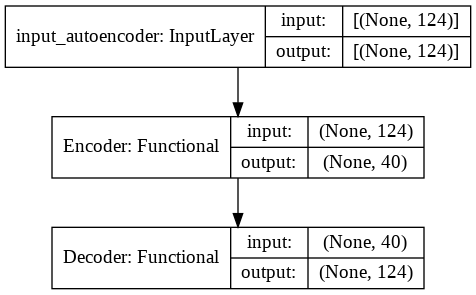

In [ ]:
plot_model(autoencoder, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.99)
autoencoder.compile(optimizer=sgd,loss='mse')

In [ ]:
# hame data ro bedam ya na
history = autoencoder.fit(X_train, X_train, batch_size = 150 , validation_data= (X_val,X_val), epochs= 50, verbose=1, callbacks=[es , lrr])

Epoch 1/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8823 - val_loss: 1.4850
Epoch 2/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8823 - val_loss: 1.4804
Epoch 3/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8817 - val_loss: 1.4872
Epoch 4/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8805 - val_loss: 1.4898
Epoch 5/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8805 - val_loss: 1.4861
Epoch 6/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8806 - val_loss: 1.4888
Epoch 7/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8804 - val_loss: 1.4829
Epoch 8/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8803 - val_loss: 1.4769
Epoch 9/50
3040/3040 [==============================] - 21s 7ms/step - loss: 0.8802 - val_loss: 1.4733
Epoch 10/50
3040/3040 [==============================] - 21s 7ms/step - l

In [ ]:
autoencoder.save_weights("auto1_weights.h5")
autoencoder.save("auto1.h5")

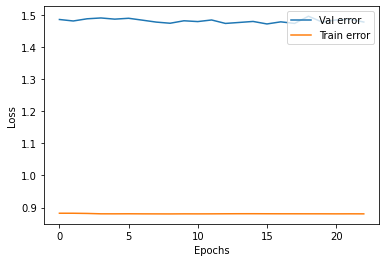

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

این آتوانکودر خوب نیست و نتیجه جالبی ندارد یک آتوانکدر دیگر می سازیم.

#Autoencoder2

در مدل جدید سایز دسته ها را بیشتر می گیریم تا شاید خطای داده ها با سرعت بیشتری کم شود

In [ ]:
encoder2_input = Input(X_train.shape[1],name = 'input_encoder')
encoder2 = Dense(200, activation='relu',name = 'encoder_layer1')(encoder2_input)
encoder2 = BatchNormalization(name = 'encoder_layer2')(encoder2)
encoder2 = Dropout(0.3 , name = 'encoder_layer3')(encoder2)
encoder2 = Dense(150, activation='relu',name = 'encoder_layer4')(encoder2)
encoder2 = Dense(40, activation='relu',name = 'encoder_layer5')(encoder2)
encoder2_output = Dense(40, activation='sigmoid',name = 'output_encoder')(encoder2)

Encoder2 = Model(inputs= [encoder2_input], outputs=[encoder2_output],name = 'Encoder')
Encoder2.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 124)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 200)               25000     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 200)               800       
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 200)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 150)               30150     
_________________________________________________________________
encoder_layer5 (Dense)       (None, 40)                6040      
_________________________________________________________________
output_encoder (Dense)       (None, 40)                1640

In [ ]:
decoder2_input = Input(40,name = 'input_decoder')
decoder2 = Dense(40, activation='relu',name = 'decoder_layer1')(decoder2_input)
decoder2 = Dense(150, activation='relu',name = 'decoder_layer2')(decoder2)
decoder2 = Dropout(0.3 , name = 'decoder_layer3')(decoder2)
decoder2 = BatchNormalization(name = 'decoder_layer4')(decoder2)
decoder2 = Dense(200, activation='relu',name = 'decoder_layer5')(decoder2)
decoder2_output = Dense(X_train.shape[1],activation = 'linear',name ='output_layer')(decoder2) 

Decoder2 = Model(inputs= [decoder2_input], outputs=[decoder2_output],name = 'Decoder')
Decoder2.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 40)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 40)                1640      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 150)               6150      
_________________________________________________________________
decoder_layer3 (Dropout)     (None, 150)               0         
_________________________________________________________________
decoder_layer4 (BatchNormali (None, 150)               600       
_________________________________________________________________
decoder_layer5 (Dense)       (None, 200)               30200     
_________________________________________________________________
output_layer (Dense)         (None, 124)               2492

In [ ]:
autoencoder2_input = Input(X_train.shape[1],name = 'input_autoencoder')
latent = Encoder2(autoencoder2_input)
decoded_data = Decoder2(latent)
autoencoder2 = Model(inputs= [autoencoder2_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder2.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 124)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 40)                63630     
_________________________________________________________________
Decoder (Functional)         (None, 124)               63514     
Total params: 127,144
Trainable params: 126,444
Non-trainable params: 700
_________________________________________________________________


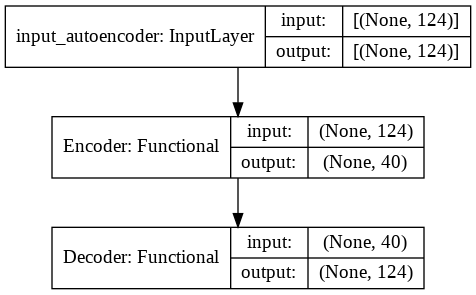

In [ ]:
plot_model(autoencoder2, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.99)
autoencoder2.compile(optimizer=sgd,loss='mse')

In [ ]:
history = autoencoder2.fit(X_train, X_train, batch_size = 250 , validation_data= (X_val,X_val), epochs= 50, verbose=1, callbacks=[es , lrr])

Epoch 1/50
1824/1824 [==============================] - 18s 9ms/step - loss: 0.7013 - val_loss: 1.0502
Epoch 2/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.5222 - val_loss: 0.9918
Epoch 3/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.4597 - val_loss: 1.0395
Epoch 4/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.4354 - val_loss: 0.9649
Epoch 5/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.4647 - val_loss: 1.0435
Epoch 6/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.5317 - val_loss: 1.0981
Epoch 7/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.5366 - val_loss: 1.0476
Epoch 8/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.5244 - val_loss: 1.0210
Epoch 9/50
1824/1824 [==============================] - 17s 9ms/step - loss: 0.5039 - val_loss: 1.0027
Epoch 10/50
1824/1824 [==============================] - 17s 9ms/step - l

In [ ]:
autoencoder2.save_weights("auto2_weights.h5")
autoencoder2.save("auto2.h5")

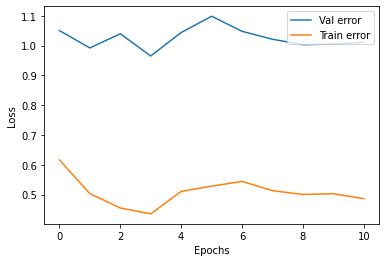

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

باز هم بنظرم نمی رسد مدل بهتر شده باشد و سراغ مدل جدید می رویم

از اینجا به بعد مدلهای خوب ما هستند  دو مدل اول روی داده ای که به روش استاندارد نرمال شده بود و با تابع فعالیت غلط در لایه ی خروجی دیکودر اموزش داده شده اند.

#autoencoder3

در این مدل سعی میکنیم آتوانکدر را با تعداد داده ی کمتری بسازیم که الگوی داده ها را یاد بگیرد که سرعت یادگیری بیشتر شود.

In [ ]:
encoder3_input = Input(X_train.shape[1],name = 'input_encoder')
encoder3 = Dense(100, activation='relu',name = 'encoder_layer1')(encoder3_input)
encoder3 = BatchNormalization(name = 'encoder_layer2')(encoder3)
encoder3 = Dropout(0.5 , name = 'encoder_layer3')(encoder3)
encoder3 = Dense(80, activation='relu',name = 'encoder_layer4')(encoder3)
encoder3 = Dense(40, activation='relu',name = 'encoder_layer5')(encoder3)
encoder3_output = Dense(30, activation='relu',name = 'output_encoder')(encoder3)

Encoder3 = Model(inputs= [encoder3_input], outputs=[encoder3_output],name = 'Encoder')
Encoder3.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 124)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 100)               12500     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 100)               400       
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 100)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 80)                8080      
_________________________________________________________________
encoder_layer5 (Dense)       (None, 40)                3240      
_________________________________________________________________
output_encoder (Dense)       (None, 30)                1230

In [ ]:
decoder3_input = Input(30,name = 'input_decoder')
decoder3 = Dense(40, activation='relu',name = 'decoder_layer1')(decoder3_input)
decoder3 = Dense(80, activation='relu',name = 'decoder_layer2')(decoder3)
decoder3 = Dropout(0.5 , name = 'decoder_layer3')(decoder3)
decoder3 = BatchNormalization(name = 'decoder_layer4')(decoder3)
decoder3 = Dense(100, activation='relu',name = 'decoder_layer5')(decoder3)
decoder3_output = Dense(X_train.shape[1],activation = 'sigmoid',name ='output_layer')(decoder3) 

Decoder3 = Model(inputs= [decoder3_input], outputs=[decoder3_output],name = 'Decoder')
Decoder3.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 30)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 40)                1240      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 80)                3280      
_________________________________________________________________
decoder_layer3 (Dropout)     (None, 80)                0         
_________________________________________________________________
decoder_layer4 (BatchNormali (None, 80)                320       
_________________________________________________________________
decoder_layer5 (Dense)       (None, 100)               8100      
_________________________________________________________________
output_layer (Dense)         (None, 124)               1252

In [ ]:
autoencoder3_input = Input(X_train.shape[1],name = 'input_autoencoder')
latent = Encoder3(autoencoder3_input)
decoded_data = Decoder3(latent)
autoencoder3 = Model(inputs= [autoencoder3_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder3.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 124)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 30)                25450     
_________________________________________________________________
Decoder (Functional)         (None, 124)               25464     
Total params: 50,914
Trainable params: 50,554
Non-trainable params: 360
_________________________________________________________________


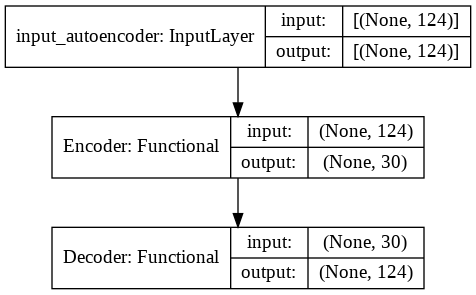

In [ ]:
plot_model(autoencoder3, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.99)
autoencoder3.compile(optimizer=sgd,loss='mse')

In [ ]:
history = autoencoder3.fit(X_train[:50000], X_train[:50000], batch_size = 128, validation_data= (X_val[:11000],X_val[:11000]) , epochs= 20, verbose=1, callbacks=[es , lrr])

Epoch 1/20
391/391 [==============================] - 2s 4ms/step - loss: 0.1370 - val_loss: 0.0147
Epoch 2/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0127 - val_loss: 0.0110
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0092 - val_loss: 0.0094
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0085 - val_loss: 0.0089
Epoch 6/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0080 - val_loss: 0.0085
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0077 - val_loss: 0.0082
Epoch 8/20
391/391 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 9/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0072 - val_loss: 0.0076
Epoch 10/20
391/391 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0074

In [ ]:
autoencoder3.save_weights("auto3_weights.h5")
autoencoder3.save("auto3.h5")

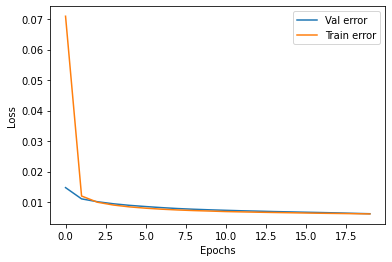

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

همانطور که میبینیم این مدل عملکرد خوبی رو داده های آموزشی و تست دارد. منتها این مدل فقط روی تعدادی از داده های آموزشی آموزش داده شده است . حال در مدل بعدی با همین ساختار کل داده های آموزشی را میدهیم تا عملکرد آن را ببینیم

#autoencoder4

In [ ]:
encoder4_input = Input(X_train.shape[1],name = 'input_encoder')
encoder4 = Dense(100, activation='relu',name = 'encoder_layer1')(encoder4_input)
encoder4 = BatchNormalization(name = 'encoder_layer2')(encoder4)
encoder4 = Dropout(0.5 , name = 'encoder_layer3')(encoder4)
encoder4 = Dense(80, activation='relu',name = 'encoder_layer4')(encoder4)
encoder4 = Dense(40, activation='relu',name = 'encoder_layer5')(encoder4)
encoder4_output = Dense(30, activation='relu',name = 'output_encoder')(encoder4)

Encoder4 = Model(inputs= [encoder4_input], outputs=[encoder4_output],name = 'Encoder')
Encoder4.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 124)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 100)               12500     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 100)               400       
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 100)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 80)                8080      
_________________________________________________________________
encoder_layer5 (Dense)       (None, 40)                3240      
_________________________________________________________________
output_encoder (Dense)       (None, 30)                1230

In [ ]:
decoder4_input = Input(30,name = 'input_decoder')
decoder4 = Dense(40, activation='relu',name = 'decoder_layer1')(decoder4_input)
decoder4 = Dense(80, activation='relu',name = 'decoder_layer2')(decoder4)
decoder4 = Dropout(0.5 , name = 'decoder_layer3')(decoder4)
decoder4 = BatchNormalization(name = 'decoder_layer4')(decoder4)
decoder4 = Dense(100, activation='relu',name = 'decoder_layer5')(decoder4)
decoder4_output = Dense(X_train.shape[1],activation = 'sigmoid',name ='output_layer')(decoder4) 

Decoder4 = Model(inputs= [decoder4_input], outputs=[decoder4_output],name = 'Decoder')
Decoder4.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 30)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 40)                1240      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 80)                3280      
_________________________________________________________________
decoder_layer3 (Dropout)     (None, 80)                0         
_________________________________________________________________
decoder_layer4 (BatchNormali (None, 80)                320       
_________________________________________________________________
decoder_layer5 (Dense)       (None, 100)               8100      
_________________________________________________________________
output_layer (Dense)         (None, 124)               1252

In [ ]:
autoencoder4_input = Input(X_train.shape[1],name = 'input_autoencoder')
latent = Encoder4(autoencoder4_input)
decoded_data = Decoder4(latent)
autoencoder4 = Model(inputs= [autoencoder4_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder4.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 124)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 30)                25450     
_________________________________________________________________
Decoder (Functional)         (None, 124)               25464     
Total params: 50,914
Trainable params: 50,554
Non-trainable params: 360
_________________________________________________________________


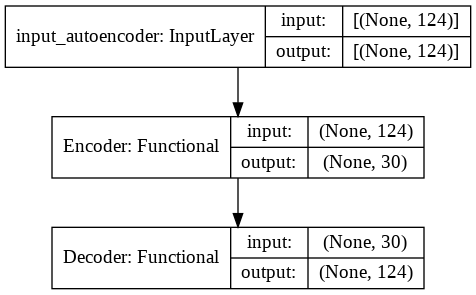

In [ ]:
plot_model(autoencoder4, show_shapes=True)

In [ ]:
sgd = SGD(lr=0.01, momentum=0.99)
autoencoder4.compile(optimizer=sgd,loss='mse')

In [ ]:
history = autoencoder4.fit(X_train, X_train, batch_size = 128, validation_data= (X_val,X_val) , epochs= 30, verbose=1, callbacks=[es , lrr])

Epoch 1/30
3562/3562 [==============================] - 13s 3ms/step - loss: 0.0375 - val_loss: 0.0076
Epoch 2/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0073 - val_loss: 0.0064
Epoch 3/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 4/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 5/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 6/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 7/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 8/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 9/30
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 10/30
3562/3562 [==============================] - 12s 3ms/step - l

In [ ]:
autoencoder4.save_weights("auto4_weights.h5")
autoencoder4.save("auto4.h5")

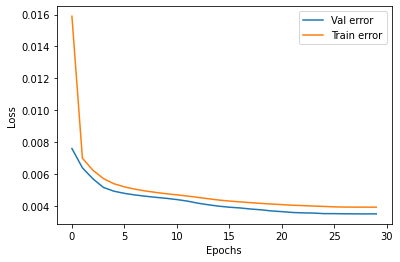

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

نتیجه این مدل خوب است و همانطور که میبینیم خطای آن روی داده های آموزشی و ولید کاهش پیدا کرده است.
پس با استفاده از همین مدل روی داده های تست پیش بینی امان را انجام می دهیم.

#autoencoder5

امتحان می کنیم اگر همان ساختار آتوانکدر قبلی با تعدد بیشتری ایپاک لرن شود بهتر می شود یا نه

In [ ]:
encoder5_input = Input(X_train.shape[1],name = 'input_encoder')
encoder5 = Dense(100, activation='relu',name = 'encoder_layer1')(encoder5_input)
encoder5 = BatchNormalization(name = 'encoder_layer2')(encoder5)
encoder5 = Dropout(0.5 , name = 'encoder_layer3')(encoder5)
encoder5 = Dense(80, activation='relu',name = 'encoder_layer4')(encoder5)
encoder5 = Dense(40, activation='relu',name = 'encoder_layer5')(encoder5)
encoder5_output = Dense(30, activation='relu',name = 'output_encoder')(encoder5)

Encoder5 = Model(inputs= [encoder5_input], outputs=[encoder5_output],name = 'Encoder')
Encoder5.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 124)]             0         
_________________________________________________________________
encoder_layer1 (Dense)       (None, 100)               12500     
_________________________________________________________________
encoder_layer2 (BatchNormali (None, 100)               400       
_________________________________________________________________
encoder_layer3 (Dropout)     (None, 100)               0         
_________________________________________________________________
encoder_layer4 (Dense)       (None, 80)                8080      
_________________________________________________________________
encoder_layer5 (Dense)       (None, 40)                3240      
_________________________________________________________________
output_encoder (Dense)       (None, 30)                1230

In [ ]:
decoder5_input = Input(30,name = 'input_decoder')
decoder5 = Dense(40, activation='relu',name = 'decoder_layer1')(decoder5_input)
decoder5 = Dense(80, activation='relu',name = 'decoder_layer2')(decoder5)
decoder5 = Dropout(0.5 , name = 'decoder_layer3')(decoder5)
decoder5 = BatchNormalization(name = 'decoder_layer4')(decoder5)
decoder5 = Dense(100, activation='relu',name = 'decoder_layer5')(decoder5)
decoder5_output = Dense(X_train.shape[1],activation = 'sigmoid',name ='output_layer')(decoder5) 

Decoder5 = Model(inputs= [decoder5_input], outputs=[decoder5_output],name = 'Decoder')
Decoder5.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_decoder (InputLayer)   [(None, 30)]              0         
_________________________________________________________________
decoder_layer1 (Dense)       (None, 40)                1240      
_________________________________________________________________
decoder_layer2 (Dense)       (None, 80)                3280      
_________________________________________________________________
decoder_layer3 (Dropout)     (None, 80)                0         
_________________________________________________________________
decoder_layer4 (BatchNormali (None, 80)                320       
_________________________________________________________________
decoder_layer5 (Dense)       (None, 100)               8100      
_________________________________________________________________
output_layer (Dense)         (None, 124)               1252

In [ ]:
autoencoder5_input = Input(X_train.shape[1],name = 'input_autoencoder')
latent = Encoder5(autoencoder5_input)
decoded_data = Decoder5(latent)
autoencoder5 = Model(inputs= [autoencoder5_input], outputs=[decoded_data],name = 'AutoEncoder')

autoencoder5.summary()

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_autoencoder (InputLaye [(None, 124)]             0         
_________________________________________________________________
Encoder (Functional)         (None, 30)                25450     
_________________________________________________________________
Decoder (Functional)         (None, 124)               25464     
Total params: 50,914
Trainable params: 50,554
Non-trainable params: 360
_________________________________________________________________


In [ ]:
sgd = SGD(lr=0.01, momentum=0.99)
autoencoder5.compile(optimizer=sgd,loss='mse')

In [ ]:
history = autoencoder5.fit(X_train, X_train, batch_size = 128, validation_data= (X_val,X_val) , epochs= 60, verbose=1, callbacks=[es , lrr])

Epoch 1/60
3562/3562 [==============================] - 13s 3ms/step - loss: 0.0365 - val_loss: 0.0066
Epoch 2/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0066 - val_loss: 0.0052
Epoch 3/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 4/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 5/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 6/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 7/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0048 - val_loss: 0.0043
Epoch 8/60
3562/3562 [==============================] - 12s 3ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 9/60
3562/3562 [==============================] - 13s 4ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 10/60
3562/3562 [==============================] - 12s 3ms/step - l

میبینیم که مدل در ایپاک 34 ام استاپ شده و در مرز اورفیت شدن بوده است. در مقایسه با مدل 4 ، عملکرد کمی بدتری داشته و ما از همان مدل 4 برای پیش بینی روی داده های تست استفاده می کنیم.

In [ ]:
autoencoder5.save_weights("auto5_weights.h5")
autoencoder5.save("auto5.h5")

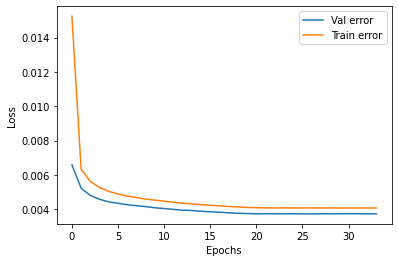

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

#load autoencoder4 and use it for predicting test results

در اینجا مدل 4 که بهترین مدل ما بوده رو لود می کنیم و با استفاده از آن روی داده های ولید پیش بینی انجام می دهیم .
هدف این است که ماکسیم خطای بازسازی از روی داده های ولید پیدا شود. و آن را یک ترشولد قرار دهیم. بعد از آن مدل 4 استفاده می کنیم تا روی داده های تست پیش بینی انجام دیم تا بفهمیم در که آیا این داده ها در کلاس تقلب هستند یا در کلاس داده های نرمال. روش کارمان نیز به این صورت است که چون مدل ما فقط روی داده های نرمال آموزش دیده پس باید بتواند داده هایی که از جنس نرمال هستند را بازسازی بکند و خطا را روی آنها کاهش دهد. بنابراین اگر داده ای به آن داده شود و خطاای بازسازی آن از ان ترشولد بیشتر باشد نتیجه گرفته می شود که از نوع تقلب بوده که مدل نتوانسته آن را با خطای کم بسازد. 

In [ ]:
from tensorflow import keras
best_autoencoder = keras.models.load_model('/content/gdrive/MyDrive/proj3_models/auto4.h5')

In [ ]:
val_predictions = best_autoencoder.predict(X_val)
mse = np.mean(np.power(X_val - val_predictions, 2), axis=1)

In [ ]:
print(mse)

[0.00142381 0.00341348 0.00199965 ... 0.00214371 0.00327971 0.0030698 ]


In [ ]:
# all of the validation dataset is in class of 0(0 means no fraud)
y_val = np.zeros((113976,), dtype=int)

In [ ]:
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': y_val})
error_df.describe()

,Reconstruction_error,True_class
count,113976.000000,113976.0
mean,0.003492,0.0
std,0.005110,0.0
min,0.000328,0.0
25%,0.001577,0.0
50%,0.002565,0.0
75%,0.004113,0.0
max,0.093777,0.0


*find maximum mse on validation data for threshold*

In [ ]:
threshold1 = max(mse)

In [ ]:
print(threshold1)

0.09377655986413293


##prediciton on test dataset

In [ ]:
predictions = best_autoencoder.predict(test)
mse = np.mean(np.power(test - predictions, 2), axis=1)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
print(len(mse))

506691


In [ ]:
for i in range(0,len(mse)):
  if mse[i] <= threshold1 :
    mse[i] = 0
  else:
    mse[i] = 1   

In [ ]:
sub = pd.DataFrame()
sub['TransactionID'] = test_id
sub['isFraud'] = mse
sub.to_csv('submission.csv', index=False)

In [ ]:
# for predicting test data and save it
test_submission = pd.read_csv('/content/gdrive/MyDrive/proj3_models/submission.csv')

In [ ]:
test_submission.head()

,TransactionID,isFraud
0,3663549,0.0
1,3663550,0.0
2,3663551,0.0
3,3663552,0.0
4,3663553,0.0


In [ ]:
test_submission.shape

(506691, 2)

In [ ]:
test_submission.describe()

,TransactionID,isFraud
count,5.066910e+05,506691.000000
mean,3.916894e+06,0.000294
std,1.462692e+05,0.017146
min,3.663549e+06,0.000000
25%,3.790222e+06,0.000000
50%,3.916894e+06,0.000000
75%,4.043566e+06,0.000000
max,4.170239e+06,1.000000


In [ ]:
item_counts = test_submission["isFraud"].value_counts()
print(item_counts)

0.0    506542
1.0       149
Name: isFraud, dtype: int64


طبق کد بالا میبینیم طبق مدلی که ما داریم و پیش بینی ک ما انجام دادیم 149 تا تراکنش تقلب در داده های تست موجود است.

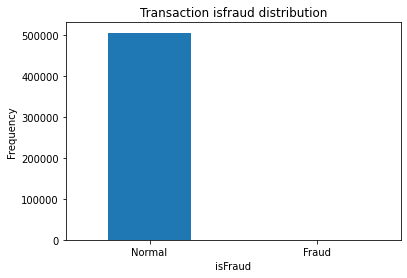

In [ ]:
# Fraud distribution in test_submission
LABELS = ["Normal", "Fraud"]

count_classes = test_submission.value_counts(test_submission['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction isfraud distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("isFraud")
plt.ylabel("Frequency");